# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)\
**I cleaned the "Price" column by replacing the commas with nothing. With the commas, the whole column is of the String type. So I remove that and then made it into int type. After that, I could use .describe to give a basic statistical summary. I end up wit no missing values. Still 30478 rows**
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.\
**For the 'subject_injury' column, there are about 9848 NA values out of 12925 total rows. This is a proportion of about 76%. When the values are missing, the force types are typically bodily force, chemical irritant, and taser. These are all sort of the controversial police violence acts that police typically don't want to admit, espically the bodily force part. The chemical irritant, in my head, links to protests and how chemical irritants are often used against large crowds.**
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.\
**Done**

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?\
**Replacing missing values with the median value does more harm than good since medians depend on the values themselves. Replacing them with values could skew the true median because what if the missing median was actually a higher or lower number. With so many missing values, another number could very well be the median, however, because we replaced all of the missing spots, we incorrectly gave the dataset bias instead.**

In [86]:
#4
df["Review Scores Rating"].isna().sum() #8323
non_missing_med = df["Review Scores Rating"].median()
df["Imputed_med"] = df["Review Scores Rating"].fillna(non_missing_med)
df["Imputed_med"].value_counts()


Imputed_med
94.0     9266
100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0      365
86.0      348
99.0      318
84.0      289
83.0      267
60.0      244
82.0      136
70.0      132
73.0       89
78.0       84
77.0       80
76.0       75
81.0       66
75.0       60
40.0       47
79.0       46
67.0       42
20.0       39
72.0       32
74.0       26
71.0       22
65.0       21
68.0       19
50.0       19
69.0       11
53.0        8
63.0        5
62.0        5
64.0        4
55.0        3
47.0        3
66.0        3
58.0        2
43.0        2
57.0        2
30.0        2
49.0        1
Name: count, dtype: int64

In [74]:
#3
df_3 = pd.read_csv("data/metabric.csv")
df_3["Overall Survival Status"].unique()
df_3["Overall Survival Status"] = df_3["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})
df_3.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [65]:
#2
df_2 = pd.read_csv("data/mn_police_use_of_force.csv") #12925
df_2["subject_injury"].unique()
df_2["subject_injury"] = df_2["subject_injury"].replace(np.nan, "Missing") 
tab = df_2.groupby("force_type")["subject_injury"].value_counts().unstack()
tab


subject_injury,Missing,No,Yes
force_type,,,
Baton,2.0,NaN,2.0
Bodily Force,7051.0,1093.0,1286.0
Chemical Irritant,1421.0,131.0,41.0
Firearm,NaN,2.0,NaN
Gun Point Display,27.0,33.0,44.0
Improvised Weapon,74.0,34.0,40.0
Less Lethal,87.0,NaN,NaN
Less Lethal Projectile,NaN,1.0,2.0
Maximal Restraint Technique,170.0,NaN,NaN


In [41]:
#1
df = pd.read_csv("data/airbnb_NYC.csv", encoding="cp1252")
df["Price"] = df["Price"].str.replace(",", "", regex = True).astype(int)
df["Price"].describe()
df.shape

(30478, 13)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?\
**.read_excel works after running pip install on an excel downloader thing.**
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.\
**An obeservation is a singular instance or row in the dataset. For this dataset, an observation is a report, which is reflected in a singular row at a time. This will effect how I get rid of my NA's because I cannot randomly choose to get rid of any and all NA's as it might decimate my dataset. Some columns have a lot of NA's and is we get rid of all rows with NA's, we would only be left with a few. When cleaning and analyzing, I think I have to pick and choose certain columns to focus cleaning on, especially rows with not many NA's.**
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?\
**I see rows from 0-2016. After filtering, the attacks increased over time, with more observations in the years 2015, 2017, and 2016.**
5. Clean the Age variable and make a histogram of the ages of the victims.\
**Done**
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?\
**The proportion of attacks that are unprovoked is 3024/3636, or about 83%**
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.\
**Done**
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?\
**It is more likely to be fatal when shark attack was unprovoked. The proportion of unprovoked deaths is higher than the proportion of provoked deaths. This could be because with most provoked attacks, the shark is defending itself, rather than attacking. With unprovoked, the shark is not acting in defense, so it might kill just to kill. Or it's hungry.**

In [ ]:
#7-8
sdf["Fatal Y/N"] = sdf["Fatal Y/N"].map({"N": "N", " N": "N", "Y": "Y"}).fillna("Unknown")
sdf["Fatal Y/N"].unique()
sdf.groupby("Fatal Y/N")["Type"].value_counts().unstack()
#Provoked death: 2.7% 
#Unprovoked death: 16.4

Type,Provoked,Unknown,Unprovoked
Fatal Y/N,,,
N,283,88,2508
Unknown,3,198,18
Y,8,32,498


In [ ]:
#6
sdf["Type"] = (sdf["Type"].map({"Provoked":"Provoked", "Unprovoked": "Unprovoked", "unprovoked": "Unprovoked"}).fillna("Unknown"))
sdf["Type"].value_counts() 



Type
Unprovoked    3024
Unknown        318
Provoked       294
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of Age')

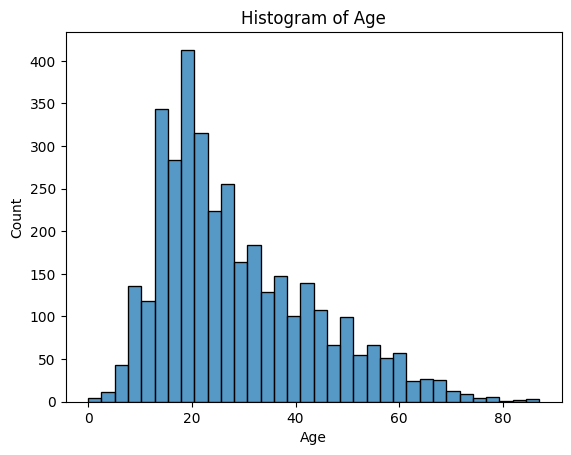

In [291]:
#5
sdf = sdf.dropna(subset = ["Age"]) #5538 --> 3761
#sns.histplot(data = sdf, x ="Age")
sdf["Age"] = sdf["Age"].astype(str).str.replace("18 months", "1")
sdf["Age"] = sdf["Age"].astype(str).str.replace("9 months", "0") # baby is ZERO years old
sdf["Age"] = sdf["Age"].astype(str).str.replace("!6", "6")
sdf["Age"] = sdf["Age"].astype(str).str.replace("!2", "2") 
sdf["Age"] = sdf["Age"].astype(str).str.replace('"', '', regex=False)
sdf = sdf[~sdf["Age"].astype(str).str.lower().isin(["?", "50+", "30+", "40+", "60+", "Middle age", "20/30", "20s", "teen", "m", "a minor", "50s", "30s"\
    "middle-age", "a minor", "45 and 15", "28 & 22", "60s", "20's", "!!", "22, 57, 31", "9 & 60", "40?", "28 & 26", "18 or 20", "40s", "30s"\
        "12 or 13", "46 & 34", "28, 23 & 30", "teens", "6½", "21 & ?", "30 or 36", "7      &    31", "16 to 18", ">50", \
            "adult", "37, 67, 35, 27,  ? & 27", "36 & 26", "mid-30s", "23 & 20", "middle age", "30s", "8 or 10", "12 or 13", "17 & 16", "f", "7 or 8", \
                "young", "2 to 3 months", "(adult)", "make line green", "\xa0 ", "25 to 35", "60's", "X", "33 & 26", "34 & 19", "13 or 18", \
                    "17 & 35", "21, 34,24 & 35", "30 & 32", "50 & 30", "33 & 37", "25 or 28", "23 & 26", "18 to 22", "9 & 12", " " ])]
sdf["Age"] = pd.to_numeric(sdf["Age"], errors="coerce")
sdf["Age"] = sdf["Age"].astype(str).str.replace('nan', '', regex=False)
sdf["Age"] = pd.to_numeric(sdf["Age"], errors="coerce")
sdf.shape # 3761 --> 3626
sns.histplot(sdf, x = "Age")
plt.title("Histogram of Age")


<Axes: xlabel='Year', ylabel='count'>

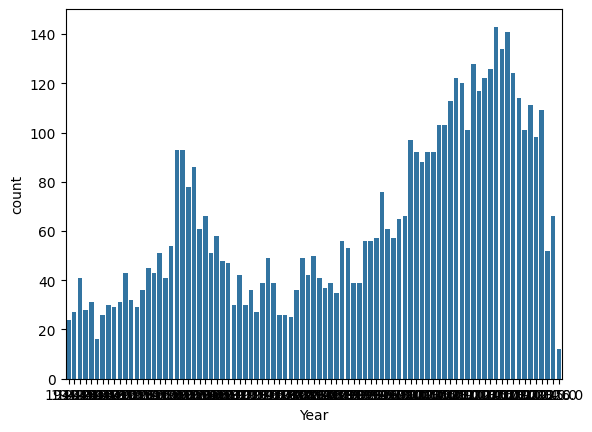

In [290]:
#1-4
sdf = pd.read_excel("GSAF5.xls") #7074
sdf = sdf.drop(columns=["Unnamed: 21", "Unnamed: 22"]) #these have close to no values
sdf = sdf.dropna(subset = ["Year"]) #7074 --> 7072
sdf = sdf[sdf["Year"] >= 1940]
sdf["Year"].value_counts() # most reports in 2015, 2017, 2016, etc
sns.countplot(data = sdf, x ="Year")


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  **This paper is about a framework that makes it easy to make messy dataframes into tidy datasets, which are easy to read tables that have variables as columns and observations as rows.**
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?\
  **Tidy data standard is intended to make data analysis easier by prepping and setting up the data in a structurally easy to parse and understand way. Using a single standard allows the user to replicate the same process on different datasets, or on the same dataset as more information is revealed. It makes cleaning the data easier and faster and faciliatates EDA.**
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."\
  **I think the sentence means that while tidy datasets are defined by having variables as columns and observations as rows, messy datasets are unique and cannot be read the same way. Messy datasets have structures that might make it hard for analysis. Tidying the messy data can go differently for each dataset because they all come with different issues. Some may have too many Nans, while other have typos that need to be replaced. Therefore, while tidy datasets have a basically the same format, messy datasets come in many different forms.  I think the second sentence is saying that when we look at a dataset. We can usually say that the rows are observations while the columns are the variables. However, sometimes, analysis is easier if we can look at the relationship between 2 columns. In my interpretation of the text, it seems that while phone number and number type may both be variables, it is easier to define a relationship when one is designated as an observation because what matters is comparing the variables, and not the rows. It kind of depends on how you want to see data and what you are trying to get out of it.**
  4. Read Section 2.2. How does Wickham define values, variables, and observations?\
  **Every value belongs to a variable and an observation, and a dataset is made up of a collection of values. A single observation should contain values spread across all the variables.**
  5. How is "Tidy Data" defined in section 2.3?\
  **Each variable forms a column. Each observation forms a row. A type of observational unit forms a table.**
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?\
  **The 5 most common problems in messy datasets are when column headers are a value rather than a variable name, multiple values are stored in one column, variables are stored in both row and column, multiple types of observation units are stored in the same table, and a single observation unit is stored in multiple tables. Table 4 is messy because it comes 3 variables: religion, income, and frequency; however, it the variable names represented in both the rows and columns. In addition, frequency is the only value. While this shows relationship, it is a messy table. Melt means to stack a dataset. All the variables are made into columns. It uses list of columns called a colvar that are already variables and uses that as an index almost.**
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?\
  **Table 11 is messy in that it is too expanded, where a singular row is not really an observation. In table 12, the table is condensed so that the date column contains 1 singular date and contains the min and max temperature of that specific day. Not only is it more compact, but each observation(row) has actual meaning. Each row represents the low and high of a singular day.**

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.\
**The histogram is extremely skewed to the right with a wide range of between -537,770 to 99,999,999. Not sure why a donation would be in the negatives. Anyways,the mean is way higher than the median, which means that super high amounts donations is lower in number (25%) but is high enough to skew the mean. The standard deviation is 3,222,011.43, which is way higher than like every number in the summary statistics other than max.**
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?\
**Contracts: 17274/28221 --> 61.2%**\
**Monetary Gift: 10936/28221 --> 38.75%**\
**Real Estate: 11/28221 --> 0.03%**
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?\
**The top 15 countries in terms of number of gifts is: England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, The Netherlands, Korea, India, and Taiwan. The top 15 countries in term of amount given is: Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia.**
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. \
**Carnegie Mellon University                       \
Cornell University                            \
Harvard University                                \
Massachusetts Institute of Technology             \
Yale University                                 \
Texas A&M University                              \
Johns Hopkins University                         \
Northwestern University                          \
Georgetown University                             \
University of Chicago (The)                      \
University of Colorado Boulder                    \
Duke University                                  \
Brigham Young University                        \
Stanford University                               \
University of Texas MD Anderson Cancer Center**  
6. Which giftors provide the most money, in total? 
**Qatar Foundation provided the most money by far. There are 3 with the same name so I assume they are the same. All 3 take up the top 3 spots for amount donated.**

In [352]:
#6
gname = gdf.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending = False)
gname[0:15]

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

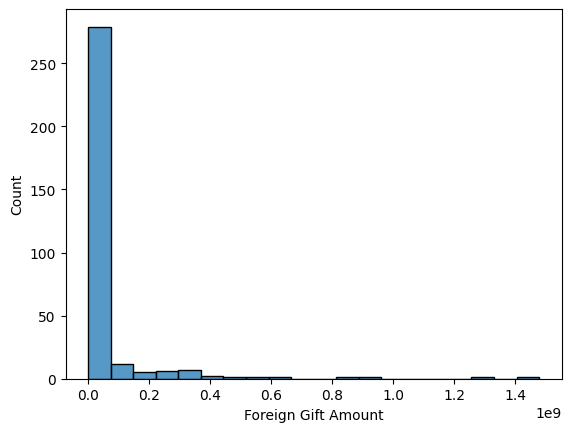

In [ ]:
#3-5
gdf["Gift Type"].value_counts()
giftor = gdf["Country of Giftor"].value_counts()
giftor[0:15]
amt = gdf.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False)
amt[0:15]
instit = gdf.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending = False)
instit[0:15]
sns.histplot(instit, bins = 20)

count       28,221.00
mean       588,232.72
std      3,222,011.43
min       -537,770.00
25%          5,700.00
50%         94,615.00
75%        376,142.00
max     99,999,999.00
Name: Foreign Gift Amount, dtype: float64

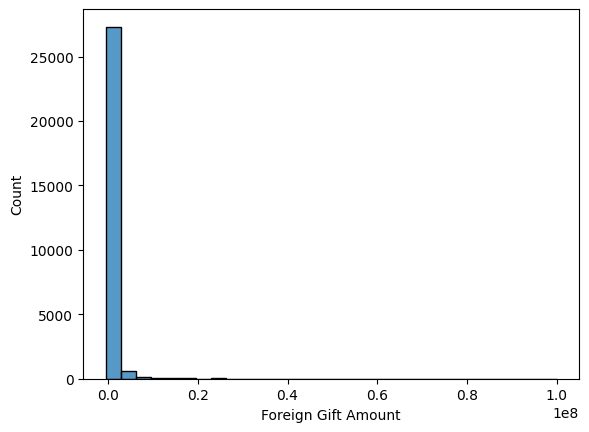

In [325]:
#1-2
gdf = pd.read_csv("data/ForeignGifts_edu.csv")
sns.histplot(gdf["Foreign Gift Amount"], bins = 30)
gdf["Foreign Gift Amount"].describe()


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.\
**There are 3798 rows of data and 63 variables**
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.\
**The private not-for-profit sector has the most 4-year institutions and the least 2 year institutions. Private for-profit has similar numbers for both. Public colleges had more 2 year institutions than 4 year.**
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?\
**The private institutions have a higher max. However, the private not-for-profit insittuitons have a higher overall rate of graduating in 4 years.**
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?\
**With just the grad_100_value and the aid_value, I can see that there is a moderately positive correlation (from the computed correlation value) between grad_100_value and aid_value. In addition, the covariance says that higher grad_100_values tend to be related to higher aid_value.**\
**After conditioning on control, I can see that private-not-for-profit institutions actually have a higher correlation with aid_value, meaning that the higher the aid_value, the more likely the student was to graduate within 4 years. From the covariance, you can see that privite not for profit is higher than the other too. A similar conclusion can be seen from the correlatin values. All 3 types of institutions correlate positively.**

cov: 
control
Private for-profit         6,897.52
Private not-for-profit   109,274.12
Public                    15,355.15
dtype: float64
corr: 
control
Private for-profit       0.19
Private not-for-profit   0.60
Public                   0.48
dtype: float64


/var/folders/p6/ndfyjpv90zq65rdw9rykcplc0000gn/T/ipykernel_31954/2568874678.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cov = cdf.groupby("control").apply(
/var/folders/p6/ndfyjpv90zq65rdw9rykcplc0000gn/T/ipykernel_31954/2568874678.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr = cdf.groupby("control").apply(


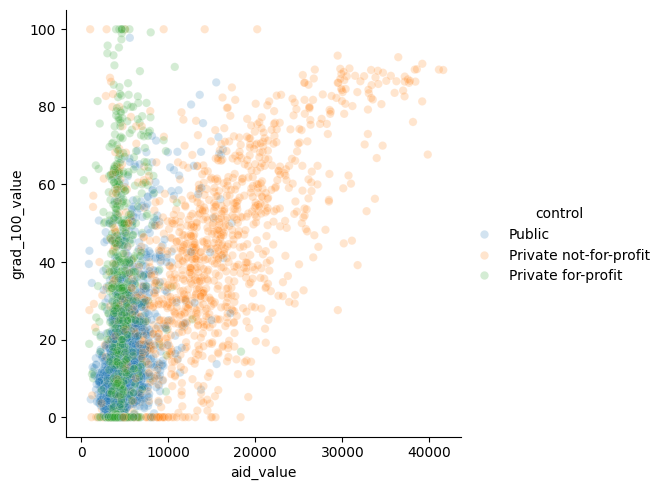

In [408]:
#5
# condition on control and cross describe
cdf["aid_value"].head()
sns.relplot(data = cdf, x = "aid_value", y = "grad_100_value", hue = "control", kind = "scatter", color = "purple", alpha = 0.2)
cov = cdf.groupby("control").apply(
    lambda d: d["aid_value"].cov(d["grad_100_value"])
)
print("cov: ")
print(cov)
corr = cdf.groupby("control").apply(
    lambda d: d["aid_value"].corr(d["grad_100_value"])
)
print("corr: ")
print(corr)

cov: 
88610.4831690244
corr: 
0.5758792845936078


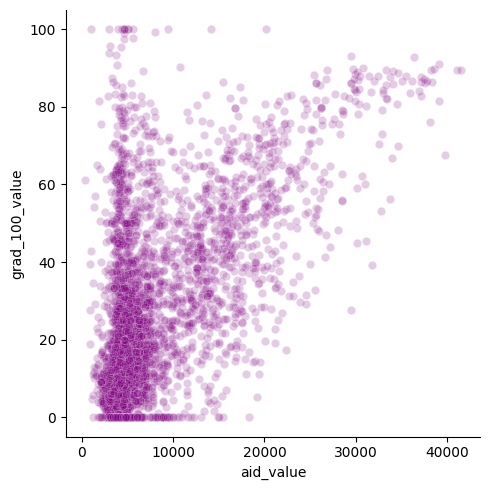

In [402]:
#5
# scatter of grad100value and aidvalue
cdf["aid_value"].head()
sns.relplot(data = cdf, x = "aid_value", y = "grad_100_value", kind = "scatter", color = "purple", alpha = 0.2)
cov = cdf["aid_value"].cov(cdf["grad_100_value"])
print("cov: ")
print(cov)
corr = cdf["aid_value"].corr(cdf["grad_100_value"])
print("corr: ")
print(corr)


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.00,29.11,25.60,0.00,6.95,24.70,46.75,100.00
Private not-for-profit,"1,189.00",41.66,23.55,0.00,25.00,41.00,58.30,100.00
Public,"1,499.00",17.43,14.73,0.00,6.90,13.20,23.25,97.80


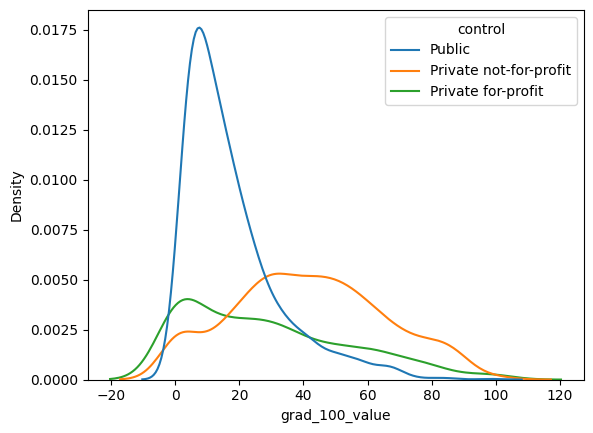

In [385]:
#4
#KDE density plot conditioned on 'control'
sns.kdeplot(data = cdf, x = "grad_100_value", hue = "control")
cdf.groupby("control")["grad_100_value"].describe()

count   3,467.00
mean       28.36
std        23.31
min         0.00
25%         9.00
50%        22.50
75%        43.65
max       100.00
Name: grad_100_value, dtype: float64

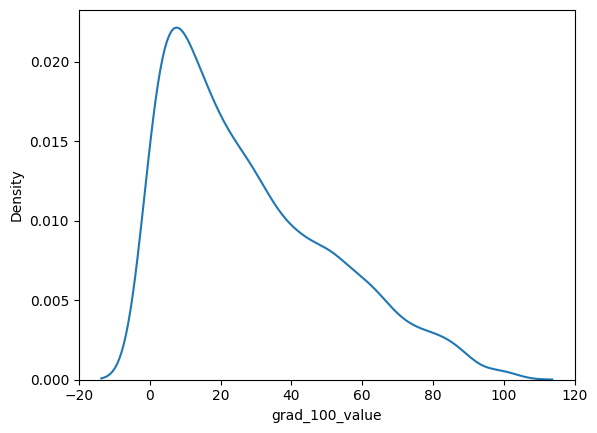

In [384]:
#4
# KDE density on grad_100_value
cdf["grad_100_value"].head()
sns.kdeplot(data = cdf, x = "grad_100_value")
cdf["grad_100_value"].describe()

In [ ]:
#3
cdf = pd.read_csv("data/college_completion.csv")
cdf.groupby("control")["level"].value_counts().unstack()


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$. **ALL WORK IN ASSIGNMENT01WORK**
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?\
**Yes, the median is equal because when x increases, it is multiplied across all xi, therefore, the ranking of each remain the same. The median will still be the median. However, the IQR is different. The 2 is lost in translation so they do not equal each other. See Assignment01Work for proof.**
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?\
**The most expensive building on average is TwnhsE. The one with the highest variance is 1Fam.**
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).\
**Done**
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?\
**There are many outliars. After conditioning, a pattern that I can see is that all the boxplots rom 25-75th quantile is all largely in the same spot, however, the outliers drag some out. Especially in 1Fam, there are lots of outliers suggesting a wider tha usual range of prices.**
5. Make a dummy variable indicating that an observation is an outlier.\
**Done**
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?\
**While the main peak is still around the same, winsorizing formed a newer peak to the right of the main peak. I think this is because all the winsorized outliers came together form a new peak, congregating around a new cutoff. The new price cutoff is now 339,500, a decrease from the 700,000ish before winsorizing. The slope is steeper in the new bump now that all the values are capped.**


count     2,930.00
mean    177,082.28
std      67,906.84
min      12,789.00
25%     129,500.00
50%     160,000.00
75%     213,500.00
max     339,500.00
Name: price_winsor, dtype: float64

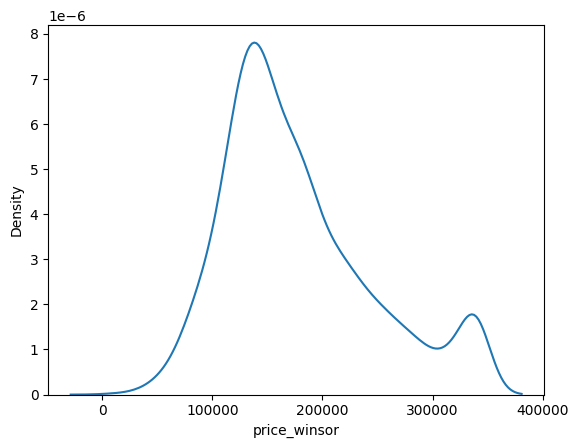

In [445]:
#6
#this code is easier than the one from class sry
adf["price_winsor"] = adf["price"].clip(lower=lower_bound, upper=upper_bound)
sns.kdeplot(data = adf, x = "price_winsor")
adf["price_winsor"].describe()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,outlier
0,1,526301100,1656,215000,20,RL,141.00,31770,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,0
1,2,526350040,896,105000,20,RH,80.00,11622,Pave,NaN,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
2,3,526351010,1329,172000,20,RL,81.00,14267,Pave,NaN,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
3,4,526353030,2110,244000,20,RL,93.00,11160,Pave,NaN,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,0
4,5,527105010,1629,189900,60,RL,74.00,13830,Pave,NaN,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0


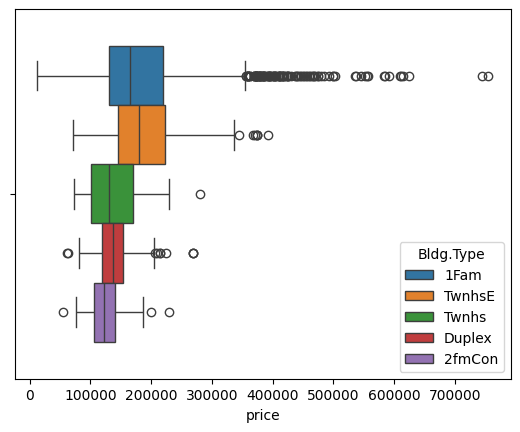

In [ ]:
#4-5
#sns.boxplot(data = adf, x = "price")
sns.boxplot(data = adf, x = "price", hue = "Bldg.Type")
q1 = adf["price"].quantile(0.25)
q3 = adf["price"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
adf["outlier"] = ((adf["price"]<lower_bound) | (adf["price"]>upper_bound)).astype(int)
adf.head()

count     2,930.00
mean    180,796.06
std      79,886.69
min      12,789.00
25%     129,500.00
50%     160,000.00
75%     213,500.00
max     755,000.00
Name: price, dtype: float64

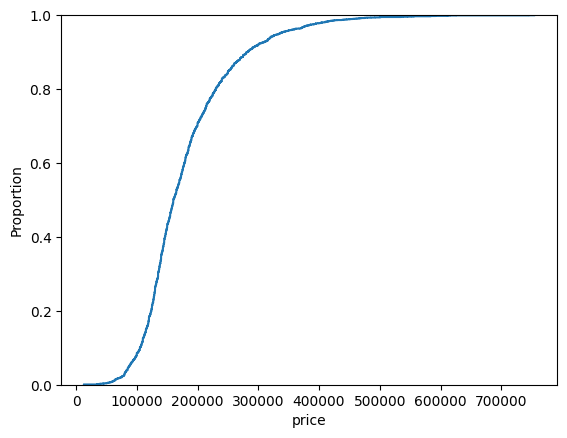

In [ ]:
#3
sns.ecdfplot(data = adf, x = "price")
adf["price"].describe()


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,"2,425.00","184,812.04","82,821.80","12,789.00","130,000.00","165,000.00","220,000.00","755,000.00"
2fmCon,62.00,"125,581.71","31,089.24","55,000.00","106,562.50","122,250.00","140,000.00","228,950.00"
Duplex,109.00,"139,808.94","39,498.97","61,500.00","118,858.00","136,905.00","153,337.00","269,500.00"
Twnhs,101.00,"135,934.06","41,938.93","73,000.00","100,500.00","130,000.00","170,000.00","280,750.00"
TwnhsE,233.00,"192,311.91","66,191.74","71,000.00","145,000.00","180,000.00","222,000.00","392,500.00"


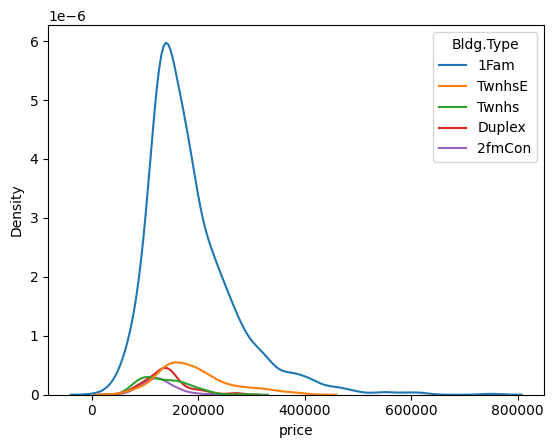

In [ ]:
#2 
# controlled on building type
sns.kdeplot(data = adf, x = "price", hue = "Bldg.Type")
adf.groupby("Bldg.Type")["price"].describe()

count     2,930.00
mean    180,796.06
std      79,886.69
min      12,789.00
25%     129,500.00
50%     160,000.00
75%     213,500.00
max     755,000.00
Name: price, dtype: float64

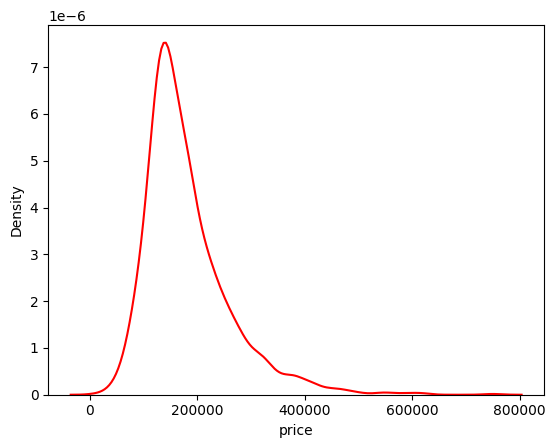

In [ ]:
#1-2
# kde of just price
adf = pd.read_csv("data/ames_prices.csv")
adf.head()
sns.kdeplot(data = adf, x = "price", color = "red")
adf["price"].describe()
cov = cdf["price"].cov(cdf["buld"])
print("cov: ")
print(cov)